<a href="https://colab.research.google.com/github/DinhoVCO/UNICAMP-IC/blob/main/MonteCarlo_Circle_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ALUMNO        :**  RONALDINHO VEGA CENTENO OLIVERA

**DISCIPLINA    :** MO0821A - TOPICOS DE REDES DE COMPUTADORES

**SEMESTRE      :** 2024-1

**CURSO         :** MESTRADO EM CIENCIAS DA COMPUTAÇÃO


# **PROBLEMA :**
Desenvolva um programa na sua linguagem de programação preferida para
realizar uma simulação de monte-carlo. Distribua dispositivos em um disco
de radio $γ$ utilizando posicao em 2D.
*   Usuários uniformemente distribuidos por unidade de área e
uniformemente distribuido na distância.
*   Calcule a distância entre cada dispositivo e o centro do disco (Note,
essa  ́e uma variável aleatória).´


*   Mostre a distribuiçao da distância calculada com a simulação de monte-carlo, média e desvio padrão para $n = 10^r$.  , onde r = 1, 2, 3, 4, 5, 6.
*   Compare com o valor analítico dessa variável aleatória.




#**SOLUÇÃO**

##Métodos gerais
Importação de bibliotecas, métodos para gráficos

In [1]:
#Importamos bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz

In [16]:
#definimos constantes
R, xc, yc = 1, 0, 0 #radio del circulo, coordenadas del centro
simulaciones = [10, 10**2, 10**3, 10**4, 10**5, 10**6 ]

In [3]:
#Métodos gerais para representar graficamente PDF CDF
def graficarPDF(axs, i , r_values, pdf_values):
    axs[i].plot(r_values, pdf_values, label='PDF')
    axs[i].set_xlabel('Raio (x)')
    axs[i].set_ylabel('Densidade de probabilidade')
    axs[i].set_title('Função de densidade de probabilidade (PDF) ')
    axs[i].legend()
    axs[i].grid(True)

def graficarCDF(axs, i , r_values, cdf_values):
    axs[i].plot(r_values, cdf_values, label='CDF', color='orange')
    axs[i].set_xlabel('Raio (x)')
    axs[i].set_ylabel('Probabilidade cumulativa')
    axs[i].set_title('Função de distribuição cumulativa (CDF) ')
    axs[i].legend()
    axs[i].grid(True)

def PlotTeoricoPDFCDF(r_values, pdf_values, cdf_values):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    graficarPDF(axs,0 , r_values, pdf_values)
    graficarCDF(axs,1 , r_values, cdf_values)
    plt.tight_layout(w_pad=6.)
    plt.show()

In [4]:
#Métodos gerais para representar graficamente a simulação
def PlotDistribution(**kwargs):
    fig, ax = plt.subplots(1,3, figsize=(12,4))

    def PlotCircle( xpoints, ypoints, rad, xc , yc, subtitleinfo, i):
        plt.subplot(1,3,1)
        plt.scatter(xpoints, ypoints,s=0.1, color='green')
        x_circle = [xc + rad * math.cos(v) for v in np.arange(0, math.pi * 2, 0.01)]
        y_circle = [yc + rad * math.sin(v) for v in np.arange(0, math.pi * 2, 0.01)]
        plt.plot(x_circle, y_circle, '-k')
        plt.title(subtitleinfo)
        plt.axis('square')

    def linear_func(x, m, b):
            return m * x + b

    def PlotPDF(dist,xpoints, ypoints,mean_distance , std_distance):
        plt.subplot(1,3,2)
        #Media y desvio
        plt.axvline(mean_distance, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_distance:.2f}')
        plt.axvline(std_distance, color='g', linestyle='dashed', linewidth=2, label=f'STD: {std_distance:.2f}')

        counts, bins, _ = plt.hist(dist, bins=100, density=True, alpha=0.2, color='blue')
        plt.title('Função de densidade de probabilidade (PDF)')
        plt.xlabel('Raio (x)')
        plt.ylabel('Densidade de probabilidade')
        plt.grid(True)
         # Fit a line to the histogram
        xdata = (bins[1:] + bins[:-1]) / 2  # Use bin centers as x-values
        popt, _ = curve_fit(linear_func, xdata, counts)
        plt.plot(xdata, linear_func(xdata, *popt), color='blue', label='PDF')
        plt.legend()

    def PlotCDF(dist,xpoints, ypoints):
        pdf_values, bins = np.histogram(dist, bins=50, density=True)
        pdf_cumulative = cumtrapz(pdf_values, x=bins[:-1], initial=0)
        plt.subplot(1,3,3)

        # Graficar la función de distribución acumulativa (CDF)
        plt.plot(bins[:-1], pdf_cumulative,color = 'orange', label='CDF', marker='o',markersize=1)

        plt.xlabel('Raio (x)')
        plt.ylabel('Probabilidade cumulativa')
        plt.title('Função de distribuição cumulativa (CDF)')
        plt.legend()
        plt.grid(True)

    for i, key in enumerate(kwargs):
        (dist ,xpoints, ypoints, rad, xc,yc, mean, std), subtitleinfo = kwargs[key]
        PlotCircle(xpoints, ypoints, rad, xc,yc,subtitleinfo,i)
        PlotPDF(dist,xpoints, ypoints, mean, std)
        PlotCDF(dist,xpoints, ypoints)

    plt.tight_layout(w_pad=4.)
    plt.show()

## **Usuários uniformemente distribuidos por unidade de área**

A densidade de pontos deve aumentar à medida que você se afasta do centro do círculo para $ x \in [0,γ]$.

\begin{align}
        \text{Area: }  & A  = \pi x^2 \\[1em]
        \text{Área Infinitesimal: }  & dA  = 2 \pi xdx
\end{align}

Podemos dizer que a área de uma pequena porção do círculo é proporcional ao raio. Como queremos que nossa “densidade amostral” corresponda a essa distribuição, você pode imaginar que a função de densidade de probabilidade (PDF) teria a forma

\begin{align}
        \text{PDF: }  & f(x)  = \alpha x \\[1em]
\end{align}

Integrando $PDF$ sobre todos os valores possíveis de $x$ deve ser igual a $1$:

\begin{align}
       \int_0^{γ} \alpha x \mathrm{d}x = 1 ,  \text{γ el radio maximo } \\[1em]
\end{align}
\begin{align}
        \left. \frac{ \alpha}{2}x^2 \right|_0^γ = 1 \\[1em]
        \frac{ \alpha}{2}γ^2 - 0 =1 \\[1em]
        \frac{ \alpha}{2}γ^2 = 1 \\[1em]
        \alpha = \frac{ 2}{γ^2}
\end{align}
Entonces :

\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        \frac{ 2x}{γ^2} & \text{if ,} 0 \le x \le  γ  \\[1em]
        0 & \text{, otherwise}\\[1em]
        \end{array}
        \right.\\[1em]
\end{align}

Integrando $f(x)$ para obter $CDF$:
\begin{align}
       F(x) = \int_0^{x}  \frac{ 2s}{γ^2} ds \\[1em]
       F(x) = \left. \frac{ s^2}{γ^2} \right|_0^x \\[1em]
       F(x) = \frac{ x^2}{γ^2}
\end{align}

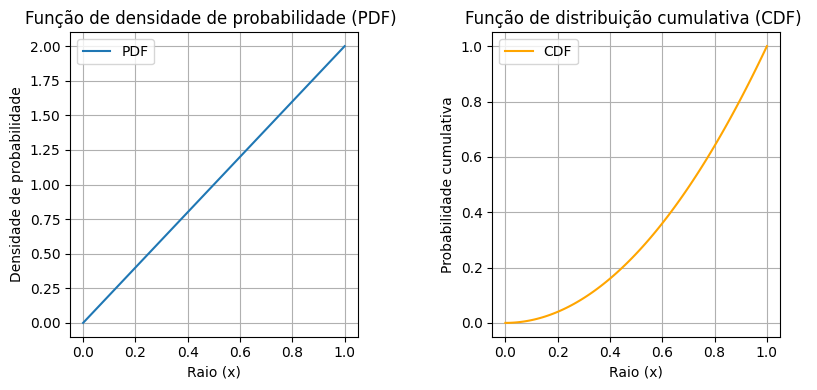

In [5]:
def pdf_circleUniform(r, R):
    return 2 * r / (R**2)

def cdf_circleUniform(r, R):
    return r**2 / R**2

r_values = np.linspace(0, R, 100)
pdf_values = pdf_circleUniform(r_values, R)
cdf_values = cdf_circleUniform(r_values, R)

PlotTeoricoPDFCDF(r_values, pdf_values, cdf_values)

Para gerar variáveis ​​aleatórias com esta distribuição específica, usamos **a transformação de probabilidade integral**. Basicamente significa que uma variável aleatória contínua arbitrária pode ser transformada em uma variável aleatória uniforme e vice-versa.

\begin{align}
       F(X) \sim U \\
       F^{-1}(U) \sim X
\end{align}

Então  :

\begin{align}
       x = F^{-1}(CDF) = γ \sqrt{CDF} =  γ \sqrt{rand()}
\end{align}

Então é necessário tirar a raiz do número aleatório gerado, o método gerado seria:

In [6]:
def UniformRandomPointsCircle(radio=1, xcenter=0 , ycenter=0):
    r = radio * math.sqrt(random.random()) #Pela transformação de probabilidade integral
    theta = 2 * math.pi * random.random()
    return xcenter + r * math.cos(theta), ycenter +  r*math.sin(theta)

### **Simulação 1**

In [7]:
def MonteCarlossimulate(func, rad, xc, yc , Ntrials = 1000):
    xpoints, ypoints, distancias =[], [], []
    for _ in range (Ntrials):
        xp, yp = func(rad, xc,yc)
        xpoints.append(xp)
        ypoints.append(yp)
        dist = np.sqrt((xp-xc)**2 + ( yp - yc)**2)
        distancias.append(dist)
    mean_distance = np.mean(distancias)
    std_distance = np.std(distancias)
    result = (distancias, xpoints, ypoints , rad, xc, yc, mean_distance, std_distance)
    return result

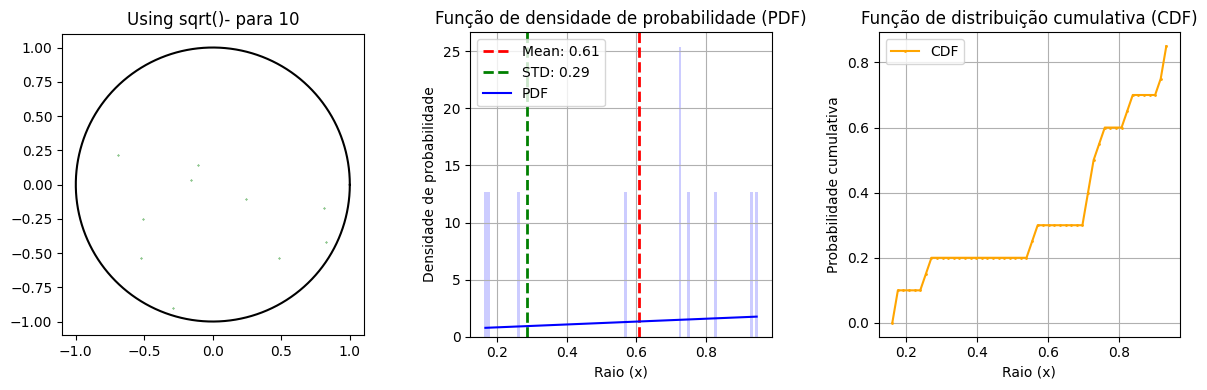

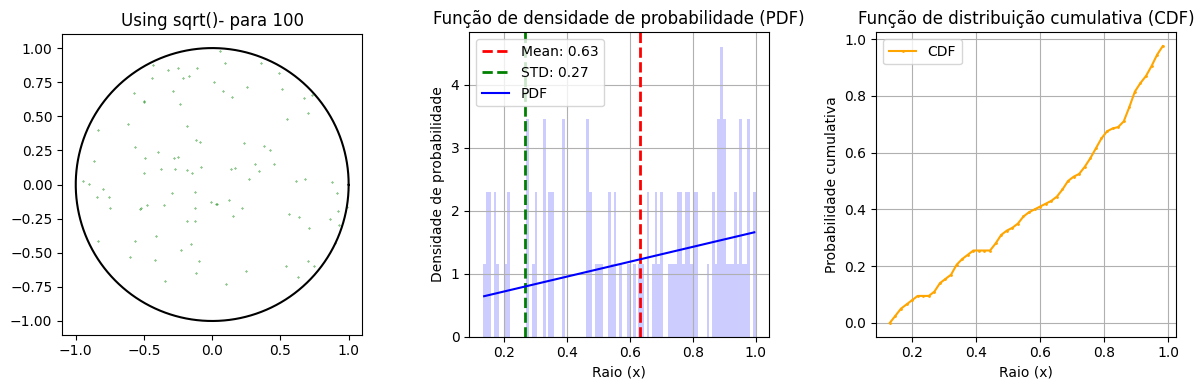

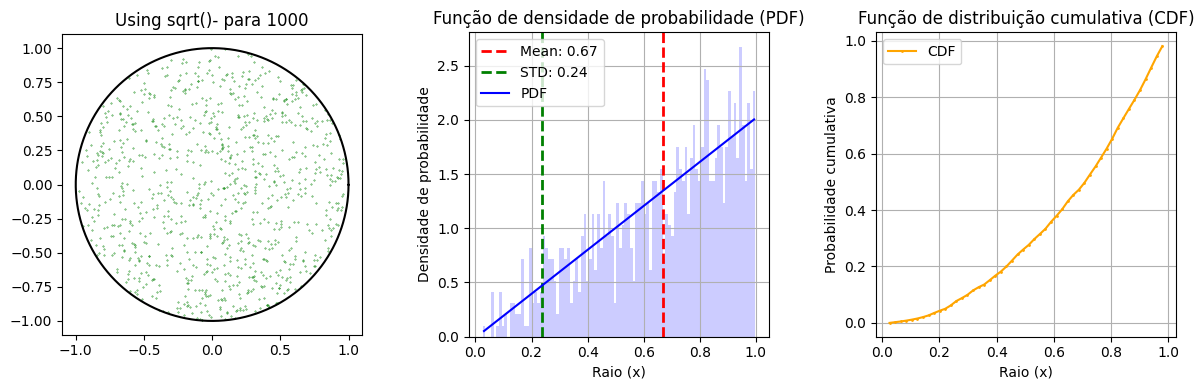

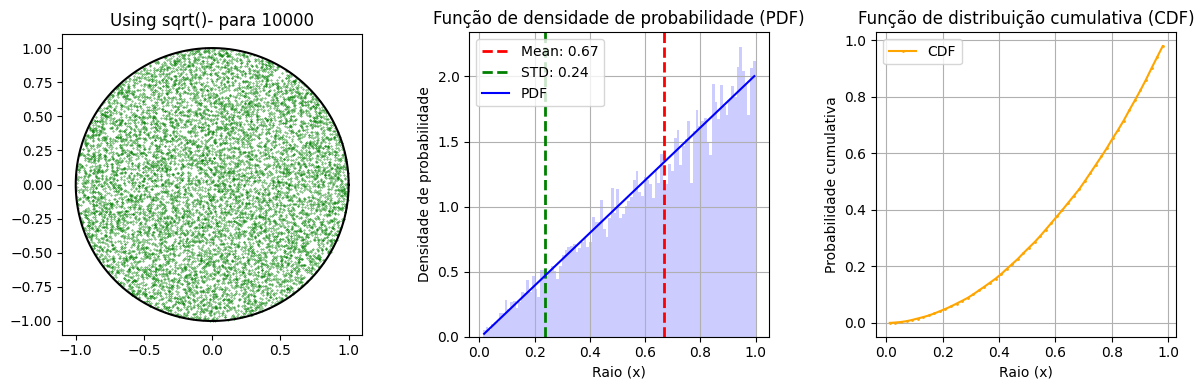

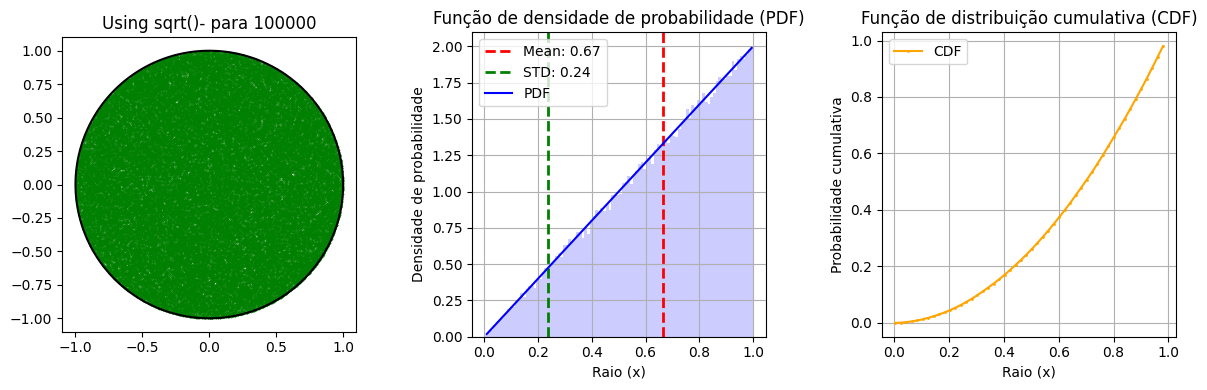

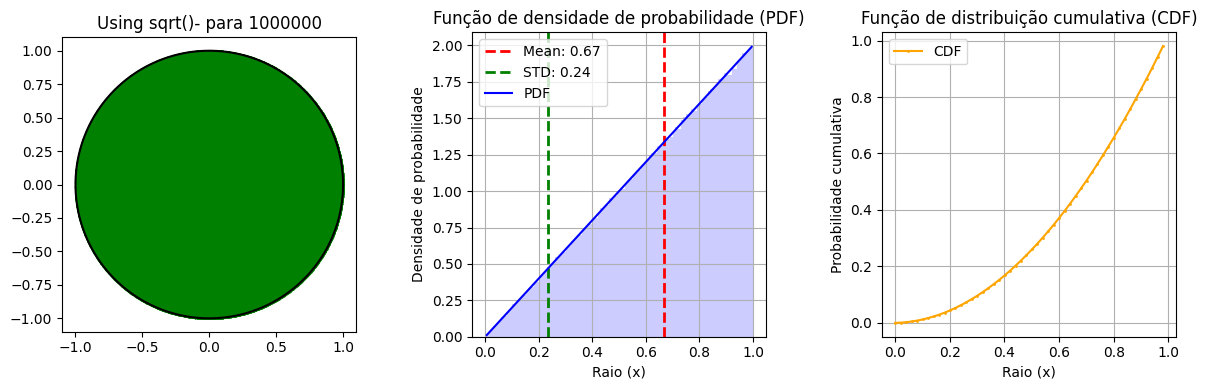

In [17]:
results =[]
for n in simulaciones:
    dist=MonteCarlossimulate(UniformRandomPointsCircle, R, xc, yc, Ntrials=n)
    results.append(dist)
    msj = f"Using sqrt()- para {n}"
    PlotDistribution(Uniform =(dist,msj))

### **Conclusões**
A PDF dada pela simulação tende para a PDF real à medida que o número de iterações aumenta. O mesmo acontece com os valores da média e do desvio padrão.

O valor analítico da média é dado por:
\begin{align}
        media = \frac{ 2 γ}{3} \\
\end{align}
O valor analítico do desvio padrão é dado por:
\begin{align}
        std = \sqrt{\frac{γ^2}{18}}  \\
\end{align}

In [18]:
media = 2 * R / 3
print(f"media analitico: {media}")
analytical_std = np.sqrt((1/18) * (R**2))
print(f"std analitico: {analytical_std}")

media analitico: 0.6666666666666666
std analitico: 0.23570226039551584


## **Usuários uniformemente distribuido na distância**

O $PDF$ é dado por :

\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        \frac{ 1}{γ} & \text{if ,} 0 \le x \le  γ  \\[1em]
        0 & \text{, otherwise}\\[1em]
        \end{array}
        \right.\\[1em]
\end{align}

Integrando $f(x)$ para obter $CDF$:
\begin{align}
       F(x) = \int_0^{x}  \frac{ 1}{γ} ds \\[1em]
       F(x) = \left. \frac{ s}{γ} \right|_0^x \\[1em]
       F(x) = \frac{ x}{γ}
\end{align}

Isso significa que a probabilidade cumulativa de que um ponto esteja dentro de um círculo de raio $γ$ r é simplesmente a razão entre $x$ (o raio do menor círculo) e $γ$ (o raio do círculo que contém todos os pontos). , o que faz sentido, uma vez que a probabilidade de estar dentro de um círculo menor deve aumentar linearmente em relação ao seu raio em relação ao círculo maior.

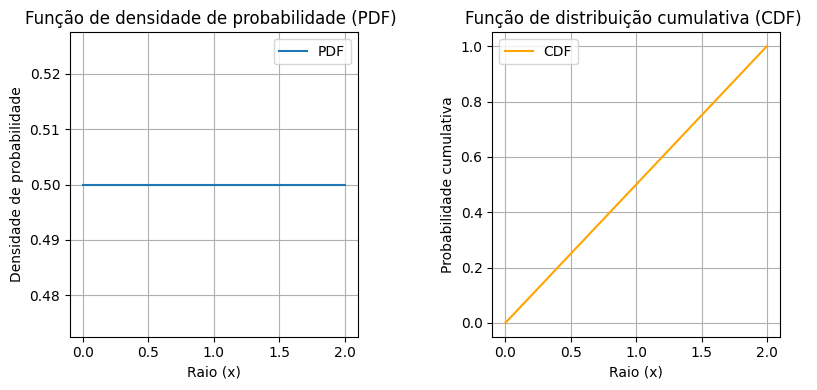

In [12]:
def pdf_circleNonUniform(r, R):
    return np.ones(len(r)) / R

def cdf_circleNonUniform(r, R):
    return r / R

r2_values = np.linspace(0, R, 100)
pdf2_values = pdf_circleNonUniform(r2_values, R)
cdf2_values = cdf_circleNonUniform(r2_values, R)

PlotTeoricoPDFCDF(r2_values, pdf2_values, cdf2_values)

### **Simulação 2**

In [13]:
def NonUniformRandomPointsCircle(radio=1, xcenter=0 , ycenter=0):
    r = radio * random.random()
    theta = 2 * math.pi * random.random()
    return xcenter + r * math.cos(theta), ycenter +  r*math.sin(theta)

media: 0.5
analytical_std: 0.28867513459481287


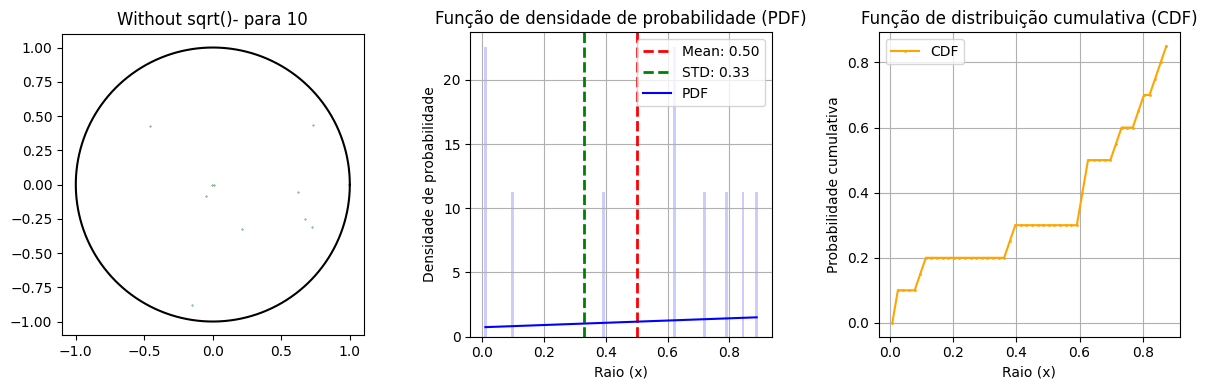

media: 0.5
analytical_std: 0.28867513459481287


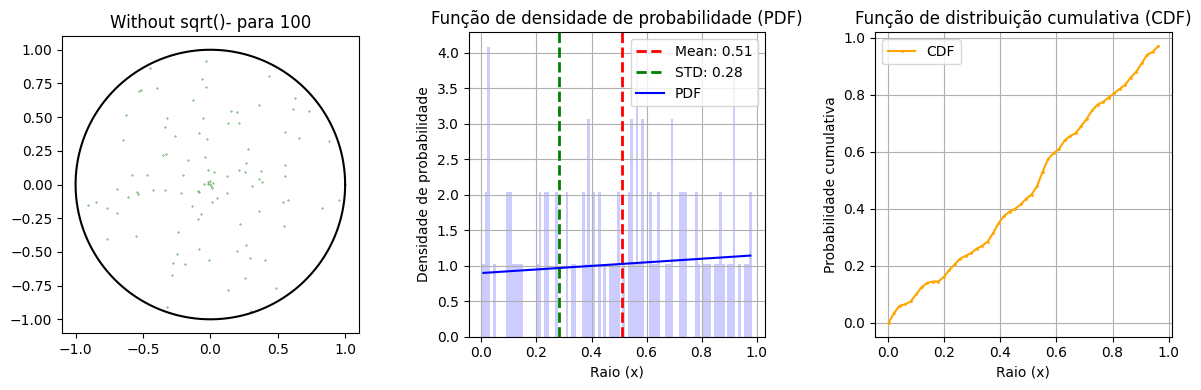

media: 0.5
analytical_std: 0.28867513459481287


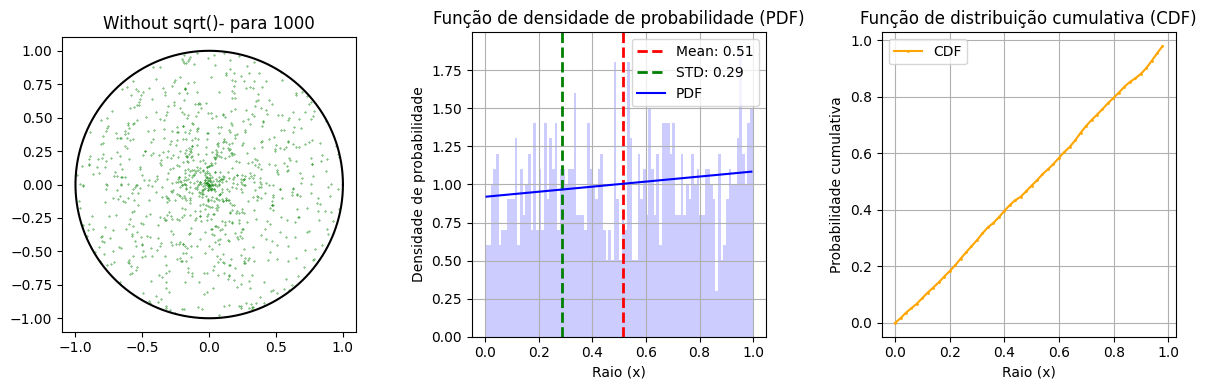

media: 0.5
analytical_std: 0.28867513459481287


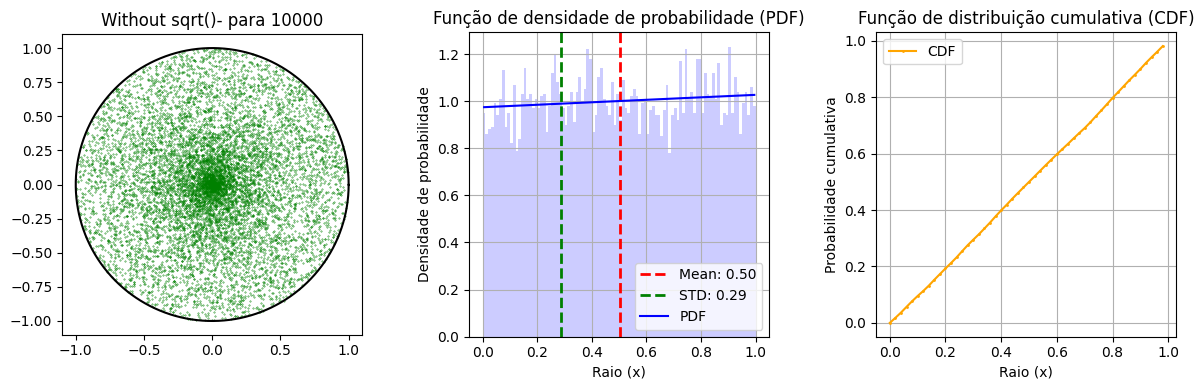

media: 0.5
analytical_std: 0.28867513459481287


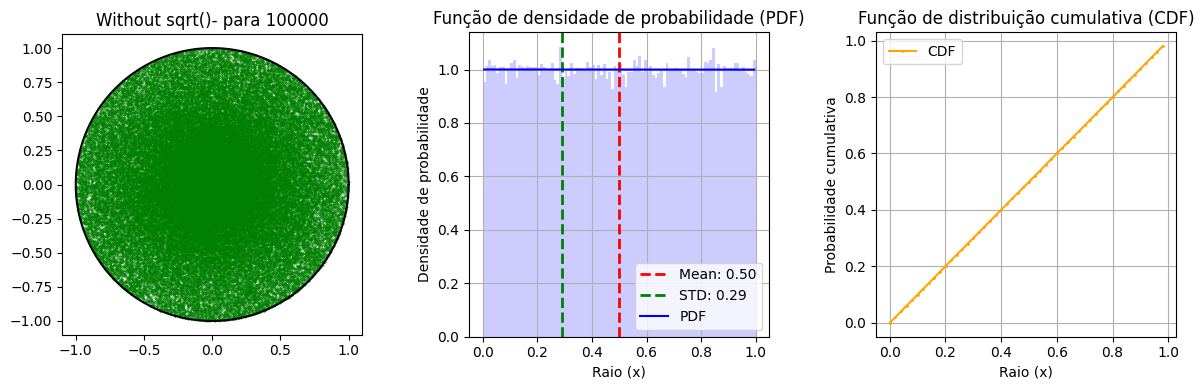

media: 0.5
analytical_std: 0.28867513459481287


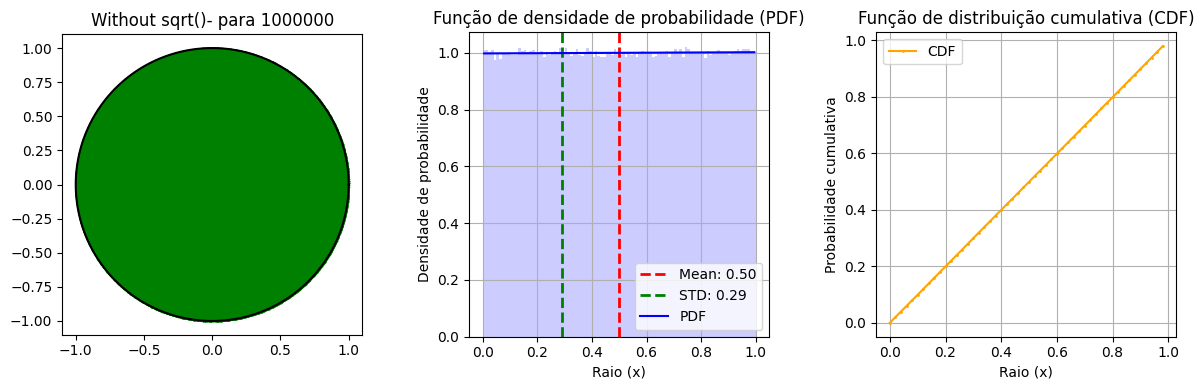

In [20]:
results2 =[]

for n in simulaciones:
    dist=MonteCarlossimulate(NonUniformRandomPointsCircle, R, xc, yc, Ntrials=n)
    media = R/2
    print(f"media: {media}")
    analytical_std = np.sqrt(R**2 / 12)
    print(f"analytical_std: {analytical_std}")
    results2.append(dist)
    msj = f"Without sqrt()- para {n}"
    PlotDistribution(Uniform =(dist,msj))

### **Conclusões**
A PDF dada pela simulação tende para a PDF real à medida que o número de iterações aumenta. O mesmo acontece com os valores da média e do desvio padrão.

O valor analítico da média é dado por:
\begin{align}
        media = \frac{γ}{2}\\
\end{align}
O valor analítico do desvio padrão é dado por:
\begin{align}
        std = \sqrt{\frac{γ^2}{12}}\\
\end{align}

In [21]:
media = R / 2
print(f"media analitico: {media}")
analytical_std = np.sqrt(R**2/12)
print(f"std analitico: {analytical_std}")
print(f"media simulação: {results2[5][6]}")
print(f"std simulação: {results2[5][7]}")

media analitico: 0.5
std analitico: 0.28867513459481287
media simulação: 0.5003652450689994
std simulação: 0.28892936231795086


bibliografia :
* https://meyavuz.wordpress.com/2018/11/15/generate-uniform-random-points-within-a-circle/
*http://6degreesoffreedom.co/circle-random-sampling/
*http://xdpixel.com/random-points-in-a-circle/